In [5]:
from utils.bert import *

In [6]:
seed = 42
min_sentence_tokens = 5
epochs_number = 5
batch_size = 40 # 30
top_n = 3
torch.manual_seed(seed)

base_model_name = "all-mpnet-base-v2"  #"paraphrase-multilingual-mpnet-base-v2" 
import_path = "./Data/Preprocessed/data_with_filled_explanations_17.2.2022.pickle"
new_model_name = "./Data/Bert/{}-fine-tuned-bert-{}".format(top_n, datetime.now().strftime('%Y-%m-%d-%H-%M-%S'))

In [7]:
new_model_name

'./Data/Bert/3-fine-tuned-bert-2022-03-26-21-30-43'

In [9]:
data = pd.read_pickle(import_path)
#data['explanation_prep'] = data['explanation_prep'].progress_apply(lambda x : preprocess_explanation(x))
train, dev_test = train_test_split(data, test_size = 0.2, random_state = 42)
dev, test = train_test_split(dev_test, test_size = 0.5, random_state = 42)

In [10]:
train = train     #[0:6000]

In [11]:
train = split_data_B(train, "explanation_prep")
dev = split_data_B(dev, "explanation_prep")
test = split_data_B(test, "explanation_prep")

  0%|          | 0/10312 [00:00<?, ?it/s]

Data splitted into list


  0%|          | 0/10312 [00:00<?, ?it/s]

Data splitted into rows


Batches:   0%|          | 0/745 [00:00<?, ?it/s]

Time for creating 372115 embedding vectors 2.7852651039759317
Model used :all-mpnet-base-v2
Embeddings done for columns source_text_sentences


Batches:   0%|          | 0/745 [00:00<?, ?it/s]

Time for creating 372115 embedding vectors 8.533345313866933
Model used :all-mpnet-base-v2
Embeddings done
Columns added


  0%|          | 0/1289 [00:00<?, ?it/s]

Data splitted into list


  0%|          | 0/1289 [00:00<?, ?it/s]

Data splitted into rows


Batches:   0%|          | 0/94 [00:00<?, ?it/s]

Time for creating 46753 embedding vectors 0.45620343685150144
Model used :all-mpnet-base-v2
Embeddings done for columns source_text_sentences


Batches:   0%|          | 0/94 [00:00<?, ?it/s]

Time for creating 46753 embedding vectors 1.1823562423388163
Model used :all-mpnet-base-v2
Embeddings done
Columns added


  0%|          | 0/1290 [00:00<?, ?it/s]

Data splitted into list


  0%|          | 0/1290 [00:00<?, ?it/s]

Data splitted into rows


Batches:   0%|          | 0/93 [00:00<?, ?it/s]

Time for creating 46368 embedding vectors 0.4641738732655843
Model used :all-mpnet-base-v2
Embeddings done for columns source_text_sentences


Batches:   0%|          | 0/93 [00:00<?, ?it/s]

Time for creating 46368 embedding vectors 1.169704004128774
Model used :all-mpnet-base-v2
Embeddings done
Columns added


In [12]:
train[['source_text_sentences_count',"sentence_token_len"]].describe()

,source_text_sentences_count,sentence_token_len
count,355204.000000,355204.000000
mean,40.625356,22.346426
std,14.194675,11.723729
min,1.000000,6.000000
25%,30.000000,14.000000
50%,39.000000,20.000000
75%,49.000000,28.000000
max,133.000000,482.000000


In [13]:
train

,index,id,reviewer,date,statement,explanation,shortExplanation,truth_o_meter,tags,url,...,shortExplanationTokensLength,statementexplanationTokensLength,label,source_text,source_text_sentences,source_text_sentences_count,source_text_sentences_index,source_text_sentences_embed,shortExplanation_prep_embed,sentence_token_len
0,8991,8992,Jeffrey S. Solochek,"July 22, 2013",New school testing standards will consume app...,"Florida is in the midst of implementing new, ...",In a letter to the state education commission...,mostly-true,"[Education, Florida, Will Weatherford]",https://www.politifact.com/factchecks/2013/jul...,...,157,724,0,"Florida is in the midst of implementing new, t...","Florida is in the midst of implementing new, t...",34,0,"[0.043405887, 0.005008328, 0.0053592697, -0.04...","[7.5429125e-05, -0.018272214, -0.03859946, -0....",18
1,8991,8992,Jeffrey S. Solochek,"July 22, 2013",New school testing standards will consume app...,"Florida is in the midst of implementing new, ...",In a letter to the state education commission...,mostly-true,"[Education, Florida, Will Weatherford]",https://www.politifact.com/factchecks/2013/jul...,...,157,724,0,"Florida is in the midst of implementing new, t...","To do that, the state needs to replace the wel...",34,1,"[-0.015448601, -0.0055387453, -0.02406913, -0....","[7.5429125e-05, -0.018272214, -0.03859946, -0....",18
2,8991,8992,Jeffrey S. Solochek,"July 22, 2013",New school testing standards will consume app...,"Florida is in the midst of implementing new, ...",In a letter to the state education commission...,mostly-true,"[Education, Florida, Will Weatherford]",https://www.politifact.com/factchecks/2013/jul...,...,157,724,0,"Florida is in the midst of implementing new, t...","As the 2014-15 deadline approaches, though, qu...",34,2,"[0.0148077365, 0.041235667, -0.032506, -0.0267...","[7.5429125e-05, -0.018272214, -0.03859946, -0....",22
3,8991,8992,Jeffrey S. Solochek,"July 22, 2013",New school testing standards will consume app...,"Florida is in the midst of implementing new, ...",In a letter to the state education commission...,mostly-true,"[Education, Florida, Will Weatherford]",https://www.politifact.com/factchecks/2013/jul...,...,157,724,0,"Florida is in the midst of implementing new, t...","On July 17, Florida’s top lawmakers weighed in...",34,3,"[-0.0026037737, 0.073638774, 0.00091701956, 0....","[7.5429125e-05, -0.018272214, -0.03859946, -0....",12
4,8991,8992,Jeffrey S. Solochek,"July 22, 2013",New school testing standards will consume app...,"Florida is in the midst of implementing new, ...",In a letter to the state education commission...,mostly-true,"[Education, Florida, Will Weatherford]",https://www.politifact.com/factchecks/2013/jul...,...,157,724,0,"Florida is in the midst of implementing new, t...",House Speaker Will Weatherford and Senate Pres...,34,4,"[0.020510498, -0.009640793, 0.0016139697, 0.03...","[7.5429125e-05, -0.018272214, -0.03859946, -0....",45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372108,7314,7315,W. Gardner Sel,"September 25, 2014","Austin has over 1,000 city employees that mak...","UPDATE 6:15 p.m., Sept. 26, 2014: We revised ...","Wiley said more than 1,000 city workers make ...",mostly-true,"[City Budget, City Government, Corrections and...",https://www.politifact.com/factchecks/2014/sep...,...,54,507,10311,"UPDATE 6:15 p.m., Sept. 26, 2014: We revised t...","So at that time, the city projects, 1,198 posi...",24,17,"[0.0037410727, 0.09336234, 0.0043395716, 0.007...","[-0.046154577, 0.093862906, 0.032243356, 0.057...",13
372109,7314,7315,W. Gardner Sel,"September 25, 2014","Austin has over 1,000 city employees that mak...","UPDATE 6:15 p.m., Sept. 26, 2014: We revised ...","Wiley said more than 1,000 city workers make ...",mostly-true,"[City Budget, City Government, Corrections and...",https://www.politifact.com/factchecks/2014/sep...,...,54,507,10311,"UPDATE 6:15 p.m., Sept. 26, 2014: We revised t...

In [14]:
# create cosine similarity column
train["cos_similarity"] = train[["source_text_sentences_embed","shortExplanation_prep_embed"]].progress_apply(lambda x : cos_sim(x), axis=1)
dev["cos_similarity"] = dev[["source_text_sentences_embed","shortExplanation_prep_embed"]].progress_apply(lambda x : cos_sim(x), axis=1)
test["cos_similarity"] = test [["source_text_sentences_embed","shortExplanation_prep_embed"]].progress_apply(lambda x : cos_sim(x), axis=1)

  0%|          | 0/355204 [00:00<?, ?it/s]

  0%|          | 0/44624 [00:00<?, ?it/s]

  0%|          | 0/44338 [00:00<?, ?it/s]

In [15]:
train.columns

Index(['index', 'id', 'reviewer', 'date', 'statement', 'explanation',
       'shortExplanation', 'truth_o_meter', 'tags', 'url', 'statement_prep',
       'explanation_prep', 'shortExplanation_prep',
       'statement_explanation_prep', 'statementTokensLength',
       'explanationTokensLength', 'shortExplanationTokensLength',
       'statementexplanationTokensLength', 'label', 'source_text',
       'source_text_sentences', 'source_text_sentences_count',
       'source_text_sentences_index', 'source_text_sentences_embed',
       'shortExplanation_prep_embed', 'sentence_token_len', 'cos_similarity'],
      dtype='object')

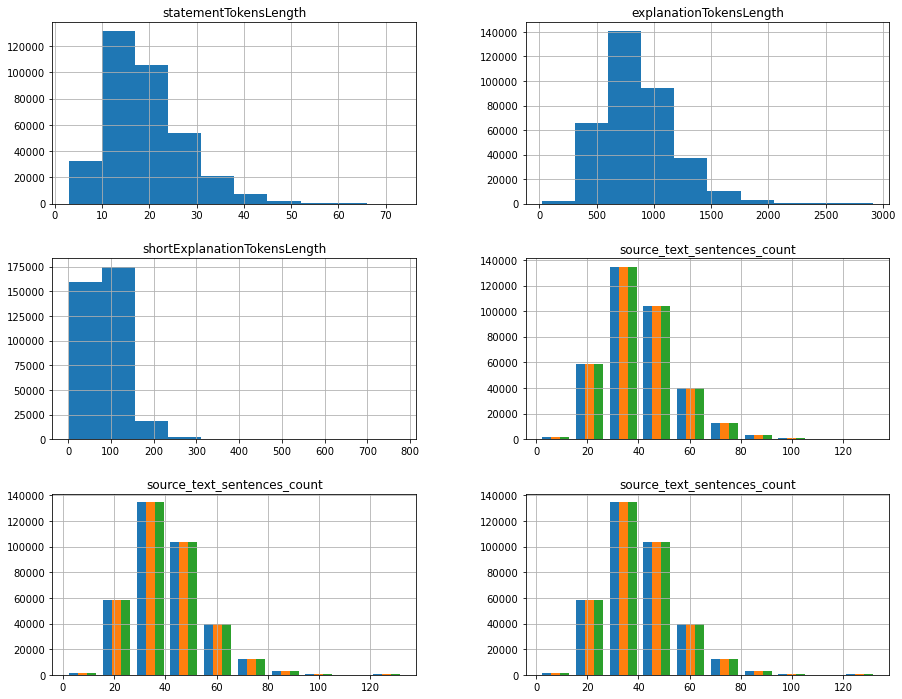

In [16]:
plot = train[['statementTokensLength', 'explanationTokensLength', 'shortExplanationTokensLength',
                 'source_text_sentences_count','source_text_sentences_count','source_text_sentences_count']].hist(figsize=(15, 12))

<AxesSubplot:xlabel='cos_similarity'>

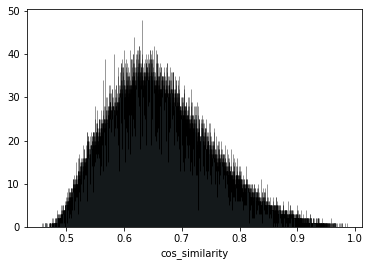

In [17]:
plot_column_distribution(train, "cos_similarity")
#train[['cos_similarity']].describe()

In [18]:
train,train_down = get_oracles_B(train, True, top_n)
dev, dev_down = get_oracles_B(dev, True, top_n)
test, test_down = get_oracles_B(test, True, top_n)

In [19]:
#plot_column_distribution(train, "cos_similarity")

In [20]:
triplets, test_df = get_triple_from_df_B(train,train_down,
                       "id" , "source_text_sentences")

  0%|          | 0/10312 [00:00<?, ?it/s]

Too few sentences !


0it [00:00, ?it/s]

In [21]:
test_df[test_df.source_text_sentences == test_df.negatives]

,id,source_text_sentences,positives,negatives


In [22]:
test_df[0:50]
len(test_df)

30903

In [23]:
# Load pre-trained model - we are using the original Sentence-BERT for this example.
sbert_model = SentenceTransformer(base_model_name, device='cuda:0') # device='cuda:0'

# Initialize triplet loss
loss = TripletLoss(model = sbert_model)

In [24]:
finetune_data = SentencesDataset(examples=triplets, model=sbert_model)
finetune_dataloader = DataLoader(finetune_data, shuffle = True, batch_size = batch_size)

In [25]:
triplets_dev, test_df = get_triple_from_df_B(dev, dev_down,
                       "id" , "source_text_sentences")
evaluator = TripletEvaluator.from_input_examples(triplets_dev, name = 'dev')

  0%|          | 0/1289 [00:00<?, ?it/s]

0it [00:00, ?it/s]

In [26]:
triplets_test, test_df = get_triple_from_df_B(test,test_down,
                       "id" , "source_text_sentences")

  0%|          | 0/1290 [00:00<?, ?it/s]

0it [00:00, ?it/s]

In [27]:
math.ceil(len(finetune_data) * epochs_number / batch_size * 0.01)

39

In [28]:
epochs_number

5

In [29]:
####  Configure the fine-tunning #### 
warmup_steps = math.ceil(len(finetune_data) * epochs_number / batch_size * 0.1) # 5% of train data for warm-up
print("Warmup-steps: {}".format(warmup_steps))

# Fine-tune the model
start = time.time()
gc.collect()
torch.cuda.empty_cache()
sbert_model.fit(train_objectives=[(finetune_dataloader, loss)],
                evaluator = evaluator,
                epochs = epochs_number,
                warmup_steps = warmup_steps,
                output_path = new_model_name,
                checkpoint_path = new_model_name + "/checkpoints/"
               ) #epochs_number
end = time.time()
print("Time for fine-tunning took "+ str((end - start)/60)+" minutes") 

Warmup-steps: 387


Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Iteration:   0%|          | 0/773 [00:00<?, ?it/s]

Iteration:   0%|          | 0/773 [00:00<?, ?it/s]

Iteration:   0%|          | 0/773 [00:00<?, ?it/s]

Iteration:   0%|          | 0/773 [00:00<?, ?it/s]

Iteration:   0%|          | 0/773 [00:00<?, ?it/s]

Time for fine-tunning took 19.682535521189372 minutes


In [30]:
params = {'main_distance_function': 0, 'show_progress_bar': True}
test_evaluator = TripletEvaluator.from_input_examples(triplets_test, name = 'test', **params)
test_evaluator(sbert_model, output_path = new_model_name)

Batches:   0%|          | 0/242 [00:00<?, ?it/s]

Batches:   0%|          | 0/242 [00:00<?, ?it/s]

Batches:   0%|          | 0/242 [00:00<?, ?it/s]

0.9405377456049638

In [31]:
params = {'main_distance_function': 0, 'show_progress_bar': True}
test_evaluator = TripletEvaluator.from_input_examples(triplets_test, name = 'test', **params)
test_evaluator(sbert_model, output_path = new_model_name)

Batches:   0%|          | 0/242 [00:00<?, ?it/s]

Batches:   0%|          | 0/242 [00:00<?, ?it/s]

Batches:   0%|          | 0/242 [00:00<?, ?it/s]

0.9405377456049638

In [32]:
params = {'main_distance_function': 0, 'show_progress_bar': True}
test_evaluator = TripletEvaluator.from_input_examples(triplets_test, name = 'test', **params)
test_evaluator(sbert_model, output_path = new_model_name)

Batches:   0%|          | 0/242 [00:00<?, ?it/s]

Batches:   0%|          | 0/242 [00:00<?, ?it/s]

Batches:   0%|          | 0/242 [00:00<?, ?it/s]

0.9405377456049638

In [33]:
#### Visuzlize the performance of training model on STS benchmark train, dev, test dataset ####
train_dev_result = pd.read_csv(new_model_name + '/eval/triplet_evaluation_dev_results.csv').iloc[-2:,:]
test_result = pd.read_csv(new_model_name + '/triplet_evaluation_test_results.csv')

In [34]:
result = pd.concat([train_dev_result, test_result]).iloc[:,2:]
result['name'] = ["train", "dev", "test"]
plot_result = pd.melt(result, id_vars=['name'])

plt.figure(figsize = (12,6))
sns.barplot(x="value", y="variable", hue="name", data=plot_result, palette="Blues_d");

ValueError: Length of values (3) does not match length of index (5)